In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import librosa
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

INDEX = 13
DATA_DIR = './new-test-data/test-mfcc-v2' #update with where you stored the file
DATA2_DIR = './new-test-data/test-mfcc-v2-copy'
def aggregate_mfcc_selective(mfcc_data):
    mfcc_selected = mfcc_data[INDEX:, :]
    #features for data from 13-20
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

def aggregate_mfcc_selective2(mfcc_data):
    mfcc_selected = mfcc_data[:3, :] # Select first 20 MFCCs
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []

total_songs = len(os.listdir(DATA_DIR))
idx = 1

# Iterate over all files in the specified directory
for file_name in os.listdir(DATA_DIR):
        file_path = os.path.join(DATA_DIR, file_name)
        file_path2 = os.path.join(DATA2_DIR, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])

        # Determine label based on filename pattern
        if file_name.startswith('Asha-Bhosle'):
            label = 'Asha Bhosle'
        elif file_name.startswith('Kishore-Kumar'):
            label = 'Kishore Kumar'
        elif file_name.startswith('Lavni'):
            label = 'Lavni'
        elif file_name.startswith('Michael-Jackson'):
            label = 'Michael Jackson'
        elif file_name.startswith('Jana-Gana-Mana'):
            label = 'Jana-Gana-Mana'
        elif file_name.startswith('Bhavgeet'):
             label = 'Bhavgeet'
        else:
            print(f'Unknown label for file: {file_name}')
            
        print(f'Processed {file_name}')
        print(f'Processed {idx} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        idx += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

total_data_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_df.insert(0, 'File', file_names)
total_data_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_df.to_csv(f'features_generated_{INDEX}.csv', index=False)


Processed Asha-Bhosle-23.csv
Processed 1 of 495
Processed Michael-Jackson-55.csv
Processed 2 of 495
Processed Kishore-Kumar-63.csv
Processed 3 of 495
Processed Asha-Bhosle-32.csv
Processed 4 of 495
Processed Jana-Gana-Mana-8-MFCC.csv
Processed 5 of 495
Processed Bhavgeet-47.csv
Processed 6 of 495
Processed Lavni-20.csv
Processed 7 of 495
Processed Bhavgeet-61.csv
Processed 8 of 495
Processed Michael-Jackson-42.csv
Processed 9 of 495
Processed Asha-Bhosle-71.csv
Processed 10 of 495
Processed Bhavgeet-14.csv
Processed 11 of 495
Processed Michael-Jackson-17.csv
Processed 12 of 495
Processed Bhavgeet-18.csv
Processed 13 of 495
Processed Asha-Bhosle-47.csv
Processed 14 of 495
Processed Kishore-Kumar-5-MFCC.csv
Processed 15 of 495
Processed Michael-Jackson-24.csv
Processed 16 of 495
Processed Bhavgeet-5-MFCC.csv
Processed 17 of 495
Processed Michael-Jackson-71.csv
Processed 18 of 495
Processed Jana-Gana-Mana-49.csv
Processed 19 of 495
Processed Asha-Bhosle-66.csv
Processed 20 of 495
Processe

In [4]:

# Splitting the data into features (X) and labels (y)
X = total_data_df.drop(columns=['File', 'Label'])
y = total_data_df['Label']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of dataset:", total_data_df.shape)
print("\nColumns in dataset:\n", total_data_df.columns)
print("\nFirst 5 rows of the dataset:\n", total_data_df.head())
print("\nData Types of each column:\n", total_data_df.dtypes)
print("\nMissing values in each column:\n", total_data_df.isnull().sum())

print("\nStatistical Summary:\n", total_data_df.describe())
print("\nNumber of duplicate rows:", total_data_df.duplicated().sum())

# plt.figure(figsize=(10, 8))
# sns.heatmap(X, annot=True, cmap='coolwarm', square=True)
# plt.title("Correlation Matrix")
# plt.show()
label_column = 'Label'
print(f"\nLabel distribution in '{label_column}':\n", total_data_df[label_column].value_counts())
# label_column = 'Label'  # Replace 'label' with the actual name of the label column in your dataset
# if label_column in total_data_df.columns:
#     print(f"\nNumber of unique labels in '{label_column}':", df[label_column].nunique())
#     print(f"\nLabel distribution in '{label_column}':\n", df[label_column].value_counts())
# else:
#     print(f"\nWarning: Column '{label_column}' not found in the dataset.")


#Add a Correlation HeatMap

#too many features to analyse the plots of all of them manually 

Shape of dataset: (495, 658)

Columns in dataset:
 Index(['File', 'Label', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=658)

First 5 rows of the dataset:
                         File            Label  feature_0  feature_1  \
0         Asha-Bhosle-23.csv      Asha Bhosle -12.033679  -9.780576   
1     Michael-Jackson-55.csv  Michael Jackson  -2.017992   4.719863   
2       Kishore-Kumar-63.csv    Kishore Kumar   2.609654  -4.029758   
3         Asha-Bhosle-32.csv      Asha Bhosle  -7.141288   2.708933   
4  Jana-Gana-Mana-8-MFCC.csv   Jana-Gana-Mana   0.578080   2.455614   

   feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  ...  \
0 -11.141942  -9.832152  -8.217274  -9.227260  -6.950433   9.64

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (scaling them to have mean 0 and std 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

X_columns = X.columns

features_scaled_df = pd.DataFrame(features_scaled, columns=X_columns)
X = features_scaled_df
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_646,feature_647,feature_648,feature_649,feature_650,feature_651,feature_652,feature_653,feature_654,feature_655
0,-1.797218,-1.459910,-1.802047,-1.675976,-1.424325,-1.946801,-1.253784,0.342448,0.861760,0.319820,...,-0.457694,0.441063,-0.101805,-0.455723,-0.959850,-0.120264,0.372217,0.642130,0.229822,-0.387486
1,0.425339,1.743225,0.451488,1.929329,0.449042,1.182925,0.357764,-0.896380,-0.718321,-0.770236,...,0.768038,-0.984594,1.252500,0.973912,-1.488813,-0.589684,-0.444306,1.540440,0.450503,0.142453
2,1.452248,-0.189559,-0.278059,-0.825565,-0.446346,0.653701,-0.675105,-0.541169,-0.641508,-0.878301,...,0.829357,-0.948649,0.625686,0.762240,0.954749,-1.695737,-1.862717,-1.011740,1.712385,1.933047
3,-0.711559,1.299012,1.285862,0.069418,0.588730,0.747508,0.686550,0.787339,1.116625,1.128481,...,0.091467,1.692538,0.365706,0.207960,-2.097816,-0.303873,-0.130528,1.969638,0.258112,0.145947
4,1.001427,1.243054,0.480570,0.270193,0.105354,0.674924,0.681245,-1.235002,-1.190752,-1.676873,...,-0.971237,-1.282479,-1.267888,-1.138849,1.361174,1.439402,1.139270,-1.366892,-1.484969,-1.132724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,-0.148738,1.878886,0.712547,-0.000416,3.188391,1.138588,0.271279,0.836409,1.542315,1.237701,...,-0.108162,1.801115,0.771725,-0.018100,-2.602981,-1.287823,-0.030150,2.533191,1.020411,0.079244
491,-0.113143,1.205768,-0.470816,1.164353,-0.071561,0.877937,-0.257390,-0.187838,-0.669703,-0.689863,...,0.018065,0.542365,0.153008,0.073404,0.151582,0.181450,0.027270,0.030204,-0.263313,-0.353323
492,-0.567540,-0.117870,-0.725981,-0.298377,1.067118,-0.950162,-0.714069,0.084566,0.689099,0.665466,...,-0.053102,1.564190,0.631042,0.076790,-1.144342,-0.622811,0.166186,1.578071,0.491976,-0.182715
493,-1.489343,0.627752,0.198091,1.266334,0.831901,0.486048,-0.206103,0.084667,2.841974,3.078996,...,-0.148843,0.210393,0.016050,-0.003795,0.491013,0.573363,0.428597,-0.387330,-0.413610,-0.336027


In [8]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold
selector = VarianceThreshold(threshold=0.1)
print(X.shape)
X_selected = selector.fit_transform(X)
print(X_selected.shape)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])


(495, 656)
(495, 656)


Shape after dropping constant/correlated features: (495, 475)


/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



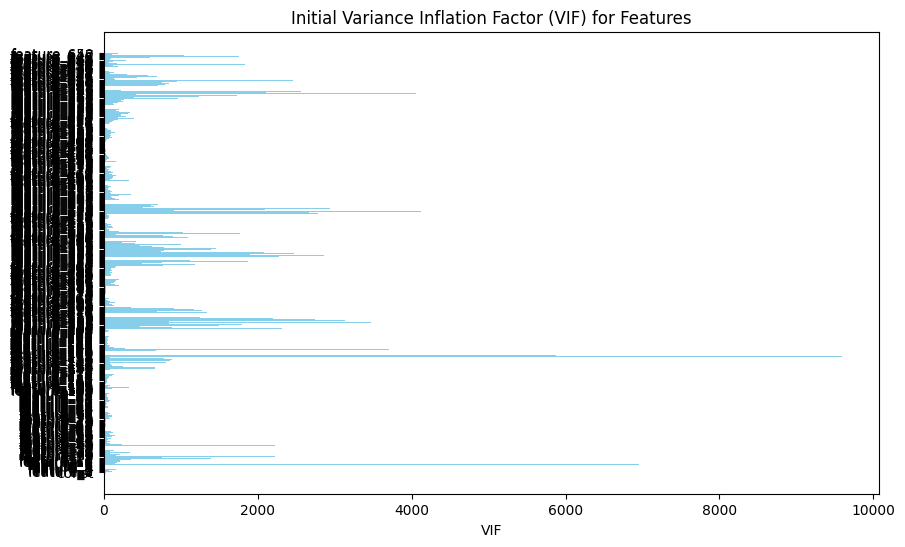


Initial VIF values for each feature:
         Feature          VIF
0          const    33.236411
1      feature_0   107.603658
2      feature_1    72.929050
3      feature_2   163.864378
4      feature_3    79.142817
..           ...          ...
471  feature_644   604.753450
472  feature_645  1754.251919
473  feature_646  1037.505536
474  feature_647   104.953916
475  feature_650   188.072147

[398 rows x 2 columns]


/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide




Final VIF values after dropping features:
         Feature          VIF
0          const    33.236411
1      feature_0   107.603658
2      feature_1    72.929050
3      feature_2   163.864378
4      feature_3    79.142817
..           ...          ...
471  feature_644   604.753450
472  feature_645  1754.251919
473  feature_646  1037.505536
474  feature_647   104.953916
475  feature_650   188.072147

[398 rows x 2 columns]


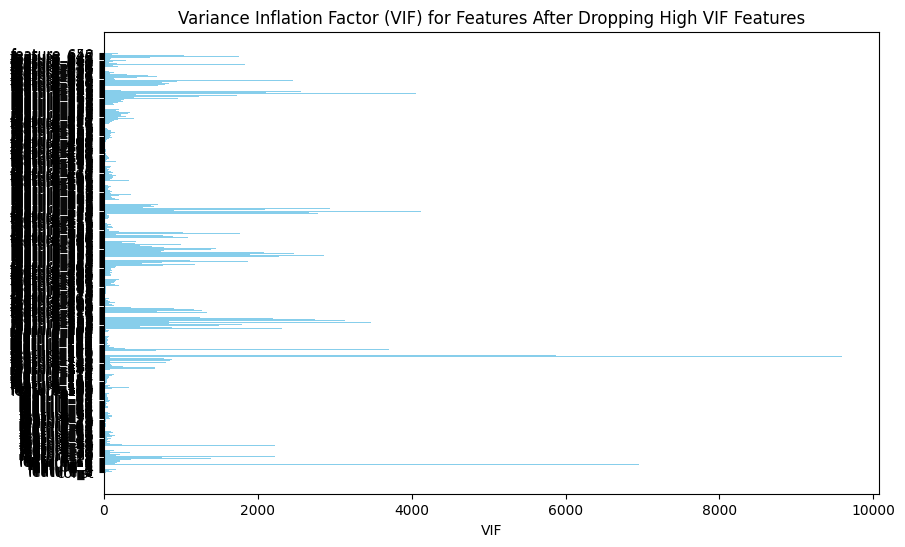


Shape of the dataset after removing high VIF features: (495, 475)


In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_selected is your feature matrix (DataFrame)
# X_selected = your_data

# Check for constant features and drop them
constant_features = X_selected.columns[X_selected.nunique() == 1]
X_selected = X_selected.drop(columns=constant_features)

# Check for highly correlated features and drop them (optional)
corr_matrix = X_selected.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:  # Adjust the threshold as needed
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

X_selected = X_selected.drop(columns=correlated_features)
print(f"Shape after dropping constant/correlated features: {X_selected.shape}")

# Add a constant to the model (for intercept)
X_with_const = sm.add_constant(X_selected)

# Function to calculate VIF for the current dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Remove infinite or NaN VIF values
    vif_data = vif_data[~vif_data['VIF'].isin([np.inf, -np.inf, np.nan])]
    return vif_data

# Initial VIF calculation
vif_data = calculate_vif(X_with_const)

# Plot initial VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Initial Variance Inflation Factor (VIF) for Features')
plt.show()

print("\nInitial VIF values for each feature:")
print(vif_data)

# Define the threshold
threshold = 0.2 * 10**8

# Use a for loop to iterate over the features and remove those with VIF > threshold
features_to_drop = vif_data[vif_data['VIF'] > threshold]['Feature']

# Drop all features that exceed the threshold
for feature in features_to_drop:
    if feature in X_selected.columns:  # Check if the feature exists in X_selected
        print(f"Dropping feature '{feature}' with VIF: {vif_data[vif_data['Feature'] == feature]['VIF'].values[0]}")
        X_selected = X_selected.drop(columns=[feature])

# Recompute VIF for the remaining features
X_with_const = sm.add_constant(X_selected)
vif_data = calculate_vif(X_with_const)

# Display the final VIF values after dropping high VIF features
print("\nFinal VIF values after dropping features:")
print(vif_data)

# Plot VIF after dropping features
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Features After Dropping High VIF Features')
plt.show()

# Final shape of the dataset after dropping high VIF features
print(f"\nShape of the dataset after removing high VIF features: {X_selected.shape}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit a random forest model
model = RandomForestClassifier()
model.fit(X_selected, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_idx = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Optionally, select features with importance greater than 0.005
selected_features = X_selected.columns[importances > 0.0005]
print(selected_features.shape)
X_selected = X_selected.drop(columns=X_selected.columns[importances < 0.0005])

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X_selected, y)

# Use X_selected.columns to match the feature set size
selected_features = X_selected.columns[info_gain > 0.05]

# Print selected features
print(selected_features)


In [33]:
#method of feature selection 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print(X.shape)

lda = LDA(n_components=5)  # LDA can have a maximum of (number of classes - 1) components
X_reduced = lda.fit_transform(X, y)  # Transformed features for the classification model
print(X_reduced.shape)
#X_reduced

(495, 656)
(495, 5)


In [ ]:
#method of feature selection 2
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
print(X.shape)

# Select top k features based on chi-square score
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(abs(X), y)
print(X_selected.shape)
#X_selected

In [ ]:
#method of feature selection 3
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()
# Initialize RFE and fit to data
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print(X_rfe.shape)

#X_rfe

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Convert categorical target to numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Now fit the Lasso model
lasso = Lasso(alpha=0.01).fit(X, y_encoded)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X)
print(X_lasso.shape)


In [ ]:
#method of feature selection 5
from sklearn.decomposition import PCA

# Initialize PCA and fit to data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)
print(X_pca.shape)


In [ ]:
#method of feature selection 6
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top k features based on mutual information score
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)
print(X_selected.shape)

In [ ]:
#method of feature selection 7
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X, y)
selected_features = X.columns[info_gain > 0.05]
print(selected_features)

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)


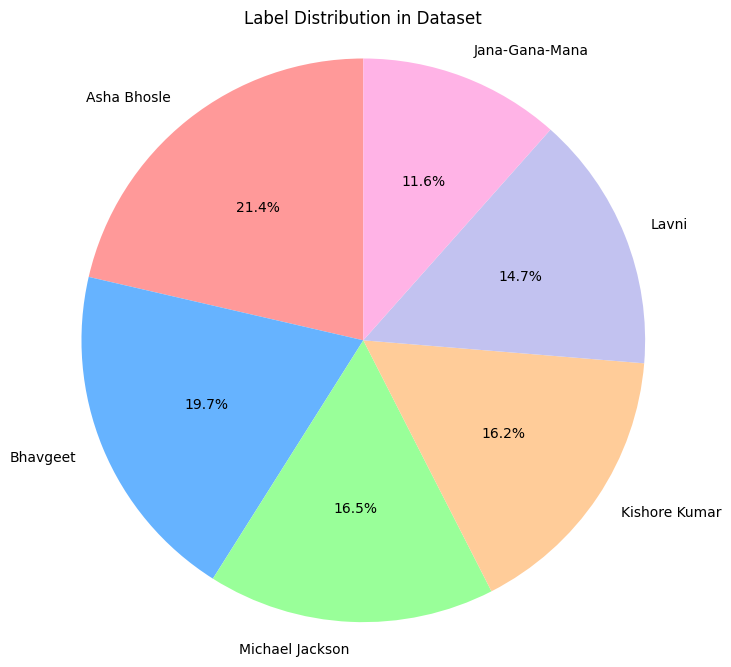

In [35]:

#making a pie chart to show weight of each label
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is a list of the labels in your dataset (replace it with your actual labels)
labels = ['Asha Bhosale', 'Kishore Kumar', 'Lavni', 'Michael Jackson', 'Jana Gana Mana', 'Bhavgeet']  

# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

In [13]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


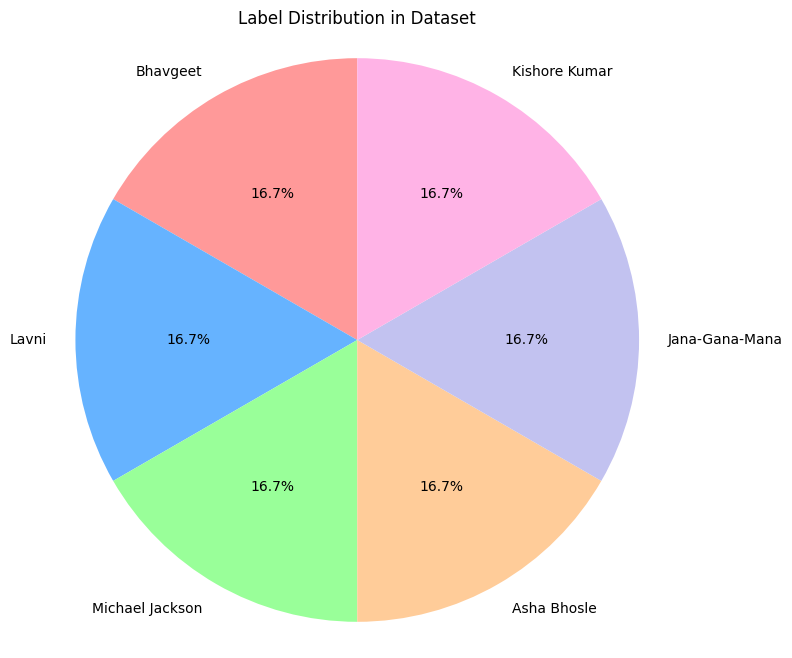

In [36]:
#from the above pie chart we can tell that the data is imbalanced, to fix the data imbalance we can use SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)


# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

#dimensional reduction

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    #'SVM': SVC(kernel='rbf', C=1.0, probability=True), # SVC with probability=True for probability estimates
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1),
    # 'SVC_linear': SVC(kernel='linear', probability=True),
    # 'SVC_rbf': SVC(kernel='rbf', probability=True),
    'RandomForest_1': RandomForestClassifier(min_samples_leaf=1),
    'RandomForest_3': RandomForestClassifier(min_samples_leaf=3),
    'RandomForest_5': RandomForestClassifier(min_samples_leaf=5),
    'NeuralNetwork_1': MLPClassifier(hidden_layer_sizes=(5)),
    'NeuralNetwork_2': MLPClassifier(hidden_layer_sizes=(5, 5)),
    'NeuralNetwork_3': MLPClassifier(hidden_layer_sizes=(5, 5, 5)),
    'NeuralNetwork_4': MLPClassifier(hidden_layer_sizes=(10))

}


In [39]:
import plotly.graph_objects as go

results = {}

# Training, prediction, and metric calculations
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train_encoded)  # Train the model
    y_pred_train = model.predict(X_train) #Predict on train set
    y_pred_test = model.predict(X_test)  # Predict on the test set
    
    # Storing metrics
    results[model_name] = {
        "Accuracy_Train": accuracy_score(y_train_encoded, y_pred_train),
        "Accuracy_Test": accuracy_score(y_test_encoded, y_pred_test),
        "Precision": precision_score(y_train_encoded, y_pred_train, average='weighted'),
        "Precision": precision_score(y_test_encoded, y_pred_test, average='weighted'),
        "Recall": recall_score(y_train_encoded, y_pred_train, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred_test, average='weighted'),
        "F1 Score": f1_score(y_train_encoded, y_pred_train, average='weighted'),
        "F1 Score": f1_score(y_test_encoded, y_pred_test, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test_encoded, y_pred_test),
        "Classification Report": classification_report(y_train_encoded, y_pred_train),
        "Classification Report": classification_report(y_test_encoded, y_pred_test)
    }

    # Plotting the confusion matrix using Plotly with numbers displayed and square grid
    confusion_mat = results[model_name]["Confusion Matrix"]
    fig = go.Figure(data=go.Heatmap(
        z=confusion_mat,
        x=[f"Predicted {i}" for i in range(len(confusion_mat))],
        y=[f"Actual {i}" for i in range(len(confusion_mat))],
        colorscale="Blues",
        text=confusion_mat,  # Display numbers in each cell
        texttemplate="%{text}",  # Format to show text values
        showscale=True
    ))
    fig.update_layout(
        title=f"Confusion Matrix for {model_name}",
        xaxis_title="Predicted Label",
        yaxis_title="Actual Label",
        xaxis=dict(scaleanchor="y", scaleratio=1)  # Ensures square cells
    )
    fig.show()



Training Logistic Regression...



Training K-Nearest Neighbors...



Training Random Forest...



Training Gradient Boosting...



Training AdaBoost...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha


Training Naive Bayes...



Training Decision Tree...



Training XGBoost...



Training RandomForest_1...



Training RandomForest_3...



Training RandomForest_5...



Training NeuralNetwork_1...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_2...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_3...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_4...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [40]:

# Display the results
for model_name, metrics in results.items():
    print(f"\nMetrics for {model_name}:\n")
    for metric, value in metrics.items():
        print(f"{metric}:\n{value}\n")



Metrics for Logistic Regression:

Accuracy_Train:
0.9954954954954955

Accuracy_Test:
1.0

Precision:
1.0

Recall:
1.0

F1 Score:
1.0

Confusion Matrix:
[[23  0  0  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 36  0  0]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0  0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        25

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



Metrics for K-Nearest Neighbors:

Accuracy_Train:
0.9954954954954955

Accuracy_Test:
1.0

Precision:
1.0

Recall:
1.0

F1 Score:
1.0

Confusion Matrix:

In [41]:
print("\nAll Models Accuracy:")
print(f"")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Accuracy_Train']:.4f}", f"{model_name}: {metrics['Accuracy_Test']:.4f}")


All Models Accuracy:

Logistic Regression: 0.9955 Logistic Regression: 1.0000
K-Nearest Neighbors: 0.9955 K-Nearest Neighbors: 1.0000
Random Forest: 0.9955 Random Forest: 1.0000
Gradient Boosting: 0.9955 Gradient Boosting: 0.9933
AdaBoost: 0.6667 AdaBoost: 0.5906
Naive Bayes: 0.9955 Naive Bayes: 1.0000
Decision Tree: 0.9955 Decision Tree: 1.0000
XGBoost: 0.9955 XGBoost: 1.0000
RandomForest_1: 0.9955 RandomForest_1: 1.0000
RandomForest_3: 0.9955 RandomForest_3: 1.0000
RandomForest_5: 0.9955 RandomForest_5: 1.0000
NeuralNetwork_1: 0.9955 NeuralNetwork_1: 1.0000
NeuralNetwork_2: 0.9955 NeuralNetwork_2: 1.0000
NeuralNetwork_3: 0.9752 NeuralNetwork_3: 0.9799
NeuralNetwork_4: 0.9955 NeuralNetwork_4: 1.0000


In [20]:
print("\nAll Models Precison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Precision']:.4f}")


All Models Precison:
Logistic Regression: 1.0000
K-Nearest Neighbors: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000
AdaBoost: 0.3151
Naive Bayes: 1.0000
Decision Tree: 1.0000
XGBoost: 1.0000
RandomForest_1: 1.0000
RandomForest_3: 1.0000
RandomForest_5: 1.0000
NeuralNetwork_1: 0.9307
NeuralNetwork_2: 0.6418
NeuralNetwork_3: 0.7523
NeuralNetwork_4: 1.0000


In [21]:
print("\nAll Models Recall:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Recall']:.4f}")


All Models Recall:
Logistic Regression: 1.0000
K-Nearest Neighbors: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000
AdaBoost: 0.4362
Naive Bayes: 1.0000
Decision Tree: 1.0000
XGBoost: 1.0000
RandomForest_1: 1.0000
RandomForest_3: 1.0000
RandomForest_5: 1.0000
NeuralNetwork_1: 0.8926
NeuralNetwork_2: 0.6443
NeuralNetwork_3: 0.8322
NeuralNetwork_4: 1.0000


In [22]:
print("\nAll Models f1-Score:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['F1 Score']:.4f}")


All Models f1-Score:
Logistic Regression: 1.0000
K-Nearest Neighbors: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000
AdaBoost: 0.3365
Naive Bayes: 1.0000
Decision Tree: 1.0000
XGBoost: 1.0000
RandomForest_1: 1.0000
RandomForest_3: 1.0000
RandomForest_5: 1.0000
NeuralNetwork_1: 0.8757
NeuralNetwork_2: 0.6133
NeuralNetwork_3: 0.7790
NeuralNetwork_4: 1.0000


In [ ]:
#show decision boundary
#ROC Curve

In [ ]:
#identify the three songs of each category
#showcase the waveform for each of the three songs found for each category

In [46]:
# I have unlabelled mfcc data for each song in a folder called 'data-v2', and I want to run the trained model on this data to predict the labels of each song.
# the data is stored in the same format as the training data, with each song's mfcc features stored in a separate CSV file.
# I want to load the data, preprocess it in the same way as the training data, and then use the trained model to predict the labels of each song.

# Load the unlabelled data
import os
import pandas as pd
import numpy as np

# Directory containing the unlabelled data
data_dir = './data-v2'
data2_dir = './data-v2-copy'

predictions = []

# LDA model
lda = LDA(n_components=5)
X_train_reduced = lda.fit_transform(X_train, y_train)


for file_name in os.listdir(data_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(data_dir, file_name)
        file_path2 = os.path.join(data2_dir, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])

        # Apply LDA transformation to reduce features to 5 components
        features_reduced = lda.transform(features)  # Apply LDA transformation

        # Make predictions using each model
        song_predictions = {'file': file_name}
        for model_name, model in models.items():
            try:
                prediction = model.predict(features_reduced)
                song_predictions[model_name] = prediction[0]
            except Exception as e:
                print(f"Error with {model_name}: {e}")
                song_predictions[model_name] = None

        # Append predictions for this song
        predictions.append(song_predictions)

# Convert predictions to a DataFrame and save
predictions_df = pd.DataFrame(predictions)
predictions_df.to_csv('predictions_unlabeled_songs.csv', index=False)
print(predictions_df)       

ValueError: Expected 2D array, got 1D array instead:
array=[-4.56737555e+00  1.12342880e+00 -4.70987669e+00 -3.08722944e+00
 -4.88002557e-01  4.12201436e-01 -2.51518691e+00  8.27424794e+00
  7.35803827e+00  8.50668491e+00  7.17105952e+00  9.01378776e+00
  6.53625363e+00  7.14754599e+00  2.53485640e+01  2.49029060e+01
  2.25392200e+01  2.01997760e+01  3.62832640e+01  2.78409770e+01
  2.36941910e+01 -3.88349900e+01 -2.47220900e+01 -3.40722270e+01
 -3.17406520e+01 -2.99348000e+01 -2.34847830e+01 -3.01082600e+01
 -1.94086772e+01  4.18533708e+00 -1.97600584e+00  2.81898634e+01
  3.76267057e+00  3.23184288e+00  2.36324013e+01  1.60909231e+01
  9.70393877e+00 -1.88536200e+02 -9.31385265e+00 -1.69360381e+01
  4.85072130e+02  2.34995827e+02  1.44690330e+02  1.24719988e+02
  9.23822440e+01  8.47525580e+01  8.13669300e+01  7.45850050e+01
  9.43299200e+01  8.74453100e+01  7.56156280e+01  6.01835130e+01
  5.41429630e+01  6.41835540e+01  4.96249960e+01  5.66114470e+01
  5.19404280e+01  6.62180640e+01  5.13257600e+01  5.38024510e+01
 -2.42638670e+00 -2.35368704e+00  1.55226972e+00 -2.12091707e-01
 -2.38031231e-02 -2.83767149e-02  7.96363780e-03 -1.07785933e-03
  5.54916380e-01  8.33072037e-02 -2.05342944e-01  2.33477751e-01
 -1.02596638e-01 -2.03992013e-01 -1.33495713e-03  7.48031323e-03
 -2.66386521e-01  9.59319048e-02  8.12280994e-02  7.53382141e-02
  7.67941426e+00  9.40052228e+00  4.82962822e+00  9.15651538e-01
  3.56850557e-02 -7.09693311e-01 -5.07494458e-01  1.73310711e-01
  7.33883159e-01 -1.71368964e-01 -1.83227339e-01 -3.20853529e-01
 -6.78612721e-02  5.94237542e-02 -1.01117747e-01 -1.21376697e-01
  1.82779413e-01  9.04832358e-02  1.24945124e-01  5.67960881e-02
  4.85153286e+08  2.50692735e+08  3.63656320e+06  1.41215444e+07
  1.44452061e+06  9.65697975e+06  4.69977848e+06  1.57900258e+06
  1.78918133e+06  3.06781695e+06  2.44679652e+06  1.40843380e+06
  7.70987958e+05  8.24372104e+05  5.11312620e+05  8.72570817e+05
  5.62554436e+05  7.52039059e+05  3.95855081e+05  5.29869919e+05
 -5.40532391e+09 -2.57365877e+09 -2.59222186e+07 -1.06668101e+08
 -8.39295274e+06 -7.07834269e+07 -3.18365689e+07 -9.11788671e+06
 -1.10477614e+07 -1.96300659e+07 -1.51789413e+07 -8.07829246e+06
 -3.95287408e+06 -4.34562520e+06 -2.42594760e+06 -4.57438028e+06
 -2.77033676e+06 -3.88387773e+06 -1.79305037e+06 -2.52872039e+06
 -2.39512080e+02  1.49763700e+02 -1.55104580e+01  2.81503800e+01
 -7.70669360e+00  1.75648380e+01 -2.77639220e+01  2.53597550e+00
 -5.47008630e-01 -2.19007110e+01 -1.96174010e+01  1.45675280e+00
 -1.04844890e+01 -1.00253960e+01 -3.65045710e+00 -1.04195385e+01
 -7.51995400e+00 -6.27026100e+00 -3.87538240e+00 -7.44538450e+00
 -1.70802690e+02  1.79690890e+02  3.65526220e+00  4.58889850e+01
  8.57085600e+00  4.05843900e+01 -7.04486000e+00  1.53769770e+01
  1.39449040e+01 -4.30104640e+00 -4.65723750e+00  1.45610600e+01
 -5.13392000e-01  1.10544610e+00  6.06054800e+00  8.70725800e-01
  1.75764130e+00  5.33505440e+00  4.56187960e+00  2.22299390e+00
  1.47211868e-05  1.08464741e-04  3.46697452e-05  8.35443697e-05
  6.40515281e-05  5.47004984e-05  8.48501743e-05  4.27680738e-05
  8.47745224e-05  4.88880870e-05  7.31550607e-05  5.69648902e-05
  6.73911489e-05  5.38779791e-05  7.24051023e-05  4.40937806e-05
  7.62722264e-05  4.27252614e-05  6.60275149e-05  5.60139879e-05
  3.33673292e+00  2.22866837e+00  1.49789090e+00  1.31461206e+00
  1.33284132e+00  1.32081716e+00  1.23043687e+00  1.08144863e+00
  1.23942232e+00  1.28945341e+00  1.09981454e+00  9.73167766e-01
  9.68483988e-01  1.02681603e+00  9.49082664e-01  9.45942119e-01
  9.42751213e-01  1.01295356e+00  8.95072925e-01  8.84258778e-01
  2.99414700e+01  1.39834398e+01  9.61736089e+00  1.03424971e+01
  8.51750912e+00  7.49960256e+00  5.09964316e+00  5.40155163e+00
  6.14344443e+00  7.98554582e+00  4.22812760e+00  4.21478145e+00
  4.81848921e+00  4.44645050e+00  3.58009810e+00  4.33524737e+00
  3.86148812e+00  4.04913443e+00  3.67625120e+00  3.61500469e+00
 -1.32176810e+01 -2.05697202e+01 -1.11453368e+01 -8.62243467e+00
 -8.48539310e+00 -5.90763380e+00 -5.42846773e+00 -6.23055006e+00
 -5.94487713e+00 -8.27315448e+00 -4.93695954e+00 -4.40415133e+00
 -4.57426798e+00 -4.74368653e+00 -5.03762191e+00 -3.32540781e+00
 -4.63206351e+00 -4.52203417e+00 -4.26376974e+00 -3.96678500e+00
  1.73647631e+00 -1.08988384e+00 -1.08575317e-01  3.35885810e-01
 -2.28353376e-01  3.74693160e-01 -3.09537668e-01  1.98555697e-01
 -1.91624911e-01 -3.53190602e-02 -2.01801989e-01  1.45833612e-01
 -2.09474073e-02  2.90379624e-02  8.38114322e-03  1.55087952e-01
 -2.38372396e-02 -7.65623254e-02 -5.42700199e-02 -6.92659376e-02
  9.13355430e+00  1.18497052e+01  5.39354434e+00  5.07236842e+00
  3.64037853e+00  2.66934291e+00  1.38536452e+00  1.88661786e+00
  1.58867270e+00  3.64474594e+00  8.84466064e-01  7.49612741e-01
  5.67063610e-01  1.09217807e+00  4.84770050e-01  4.94956108e-01
  5.79454552e-01  9.01404518e-01  6.14083481e-01  3.22020508e-01
  4.31591510e+01  3.45531600e+01  2.07626977e+01  1.89649318e+01
  1.70029022e+01  1.34072364e+01  1.05281109e+01  1.16321017e+01
  1.20883216e+01  1.62587003e+01  9.16508714e+00  8.61893278e+00
  9.39275718e+00  9.19013703e+00  8.61772001e+00  7.66065518e+00
  8.49355163e+00  8.57116860e+00  7.94002094e+00  7.58178969e+00
  1.02753717e+05  4.58400987e+04  2.07068964e+04  1.59496027e+04
  1.63950045e+04  1.61005256e+04  1.39724743e+04  1.07936028e+04
  1.41772917e+04  1.53449668e+04  1.11633248e+04  8.74037525e+03
  8.65644428e+03  9.73060682e+03  8.31309474e+03  8.25816914e+03
  8.20254928e+03  9.46964532e+03  7.39386453e+03  7.21628051e+03
 -4.18393032e+05 -1.54949516e+05 -4.39262300e+04 -2.84952522e+04
 -2.83286200e+04 -2.67513566e+04 -1.95171295e+04 -1.21353042e+04
 -1.97997130e+04 -2.53529411e+04 -1.20010459e+04 -7.01320284e+03
 -6.48711545e+03 -9.25377113e+03 -5.81082453e+03 -5.85223324e+03
 -5.80450119e+03 -8.69478184e+03 -4.49638685e+03 -3.89282710e+03
 -1.40476333e+00 -7.72277000e-01 -6.97145792e-01 -7.19607967e-01
 -6.87667542e-01 -7.38472867e-01 -6.46770217e-01 -6.63571917e-01
 -6.99325897e-01 -6.79117942e-01 -6.52292657e-01 -6.13938123e-01
 -6.27292142e-01 -6.36525126e-01 -6.24627339e-01 -6.08760728e-01
 -5.96346728e-01 -5.99039885e-01 -5.57175481e-01 -5.73490918e-01
  7.94054000e-01  9.92350333e-01  7.31170733e-01  6.71373383e-01
  7.35261100e-01  6.80286667e-01  7.32065267e-01  6.29952357e-01
  7.39235633e-01  7.04462973e-01  6.90648905e-01  5.85159828e-01
  6.23806658e-01  6.29620243e-01  6.07413027e-01  5.93244047e-01
  6.06424894e-01  6.17934167e-01  5.77320325e-01  5.83112258e-01
 -2.99730820e-04  3.26885721e-04 -2.98083212e-04  1.05338115e-04
 -3.19154208e-05 -1.45521539e-04  1.53168391e-04 -2.33561011e-04
  1.43025856e-04 -1.47913210e-04  2.53757554e-05 -4.24781480e-05
 -2.95909829e-05 -5.15406766e-05  3.74535102e-05 -1.44855446e-04
  1.20197505e-04 -1.76954856e-04  8.25643486e-05 -6.63371312e-05
  1.43706039e+00  1.09717337e+00  7.14247954e-01  6.86461169e-01
  7.43525467e-01  6.93200031e-01  6.45151124e-01  6.23714598e-01
  7.06186524e-01  7.03988132e-01  6.12068141e-01  5.90270422e-01
  5.80357888e-01  6.00447894e-01  5.72856908e-01  5.64000712e-01
  5.59597260e-01  5.81299771e-01  5.59681106e-01  5.54857268e-01
  1.06006857e+01  1.16432412e+01  3.07493950e+00  3.51136758e+00
  5.40326645e+00  4.52472377e+00  3.22865900e+00  3.13269029e+00
  4.41697429e+00  4.19274430e+00  2.60670740e+00  3.05099544e+00
  2.26262696e+00  2.87205260e+00  2.52675483e+00  2.48745800e+00
  2.11199807e+00  2.48430213e+00  2.66932549e+00  2.22651892e+00
 -9.57996292e+00 -6.79222229e+00 -3.63086905e+00 -5.72661252e+00
 -3.77128207e+00 -3.85856649e+00 -3.07960271e+00 -3.23368353e+00
 -3.62610208e+00 -4.41465618e+00 -2.71214264e+00 -2.72181996e+00
 -2.26149531e+00 -2.48932805e+00 -2.78885285e+00 -2.69601003e+00
 -2.27723686e+00 -2.76707568e+00 -2.16931070e+00 -1.99357903e+00
 -3.95708893e-02 -5.67578706e-01  3.29727798e-02  2.24141754e-01
 -1.24162404e-01  5.23042555e-02 -1.11443349e-02 -2.25639693e-03
 -6.86401187e-02  4.56165336e-02  3.65813956e-03 -1.74962461e-03
 -3.14876846e-03 -3.54522598e-02  4.45090759e-04  2.19662620e-02
  4.19712216e-03  3.83004267e-02 -4.04007812e-03 -2.29669395e-02
  7.14023561e+00  1.21549872e+01  1.54437261e+00  3.42611112e+00
  2.41172671e+00  1.31519060e+00  6.95907688e-01  9.52744687e-01
  1.49333856e+00  1.56520682e+00  4.77706011e-01  2.62982721e-01
  1.21830589e-01  5.88121035e-01  3.85816681e-01  3.13675993e-01
  2.94386022e-01  3.51104813e-01  1.95853116e-01  1.44234036e-01
  3.62225314e+00  3.31806754e+00  1.26765177e+00  1.83430348e+00
  1.78885158e+00  1.57363377e+00  1.12592463e+00  1.25382892e+00
  1.47175567e+00  1.42554672e+00  1.01874745e+00  9.97180938e-01
  8.54676458e-01  1.01912773e+00  1.12763519e+00  1.03941306e+00
  8.44710235e-01  9.35135632e-01  8.51367059e-01  8.58755856e-01
  6.14670979e+02  3.73654577e+02  1.53885145e+02  1.52351392e+02
  1.84619931e+02  1.57183365e+02  1.36480665e+02  1.30880843e+02
  1.69743530e+02  1.61896462e+02  1.25508969e+02  1.20131066e+02
  1.15436538e+02  1.20494577e+02  1.12361068e+02  1.06536174e+02
  1.06161643e+02  1.13527882e+02  1.08691808e+02  1.08472641e+02
  7.53244657e+02  5.72867215e+02  4.82713481e+02  4.68869879e+02
  5.40051106e+02  5.00074252e+02  4.61694610e+02  4.43779804e+02
  5.23648663e+02  5.02537508e+02  4.38050711e+02  4.28123699e+02
  4.18362765e+02  4.22356831e+02  4.07114777e+02  3.91621704e+02
  3.90160415e+02  4.10158182e+02  3.99144665e+02  4.00245978e+02
 -5.95993009e-01 -4.76124221e-01 -3.92583635e-01 -3.92810186e-01
 -4.32666652e-01 -4.20274600e-01 -4.03183280e-01 -3.95657539e-01
 -4.24932550e-01 -4.06773775e-01 -3.88662379e-01 -3.77027753e-01
 -3.78433725e-01 -3.77541048e-01 -3.77109171e-01 -3.66591104e-01
 -3.60042907e-01 -3.70782530e-01 -3.72229203e-01 -3.62402937e-01
  5.62060152e-01  4.45461580e-01  4.06472354e-01  4.14415946e-01
  4.24819513e-01  4.25369346e-01  4.04390093e-01  3.83549164e-01
  4.23762959e-01  4.14005527e-01  4.07216234e-01  3.81661536e-01
  3.82952993e-01  3.70042038e-01  3.67736397e-01  3.70768450e-01
  3.67634541e-01  3.78566568e-01  3.70522818e-01  3.63993850e-01
  5.26185577e-05  6.61088354e-05  5.87736932e-05  9.04213448e-01
  3.08474072e-01  3.59166477e-01  8.10384607e+00  1.57404853e+00
  1.74030444e+00 -5.93924856e+00 -1.68278592e+00 -1.34970666e+00
 -9.03094367e-05 -2.04072194e-05 -2.84961066e-05  4.45116225e-01
  1.82448691e-01  2.16077907e-01  2.71142698e+00  7.12806333e-01
  1.15754128e+00 -3.20693615e+00 -7.31653987e-01 -8.77409182e-01
  6.28896889e+01  1.13724606e+01  1.58418215e+01  2.53757585e+02
  6.71359502e+01  8.86364390e+01 -2.64083591e-01 -1.19160330e-01
 -1.43004980e-01  2.54661608e-01  1.17353656e-01  1.42191435e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.